<h1>Interactive Segmentation for analysis </h1>

<dl>Segment objects from image manually by Mouse, take measurements of objects and search about objects.</dl>

<h1>Import tools</h1>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

<h1>Implemntation for Interactive Segmentation class</h1>

In [2]:
class intractivesegmentation:
    def __init__(self):
        self.__Objectmask=[]
        self.__objectsArea=[]
        self.__images = []
        self.__cuurentImg = None
        self.__scrImg = None
        self.__masked_image = None
        self.__drawing = False
    def segment(self,image):
        self.__cuurentImg = image.copy()
        self.__scrImg = image.copy()
        self.__masked_image = np.zeros(self.__cuurentImg.shape, self.__cuurentImg.dtype)
        
        ix, iy = -1 , -1
        l = []
        def draw_circle(event, x, y, flags, param):
            global ix, iy, l
            
            if event == cv2.EVENT_LBUTTONDOWN:
                l = []
                self.__drawing = True
                ix, iy = x, y
                l.append([x, y])

            if event == cv2.EVENT_MOUSEMOVE: 
                if self.__drawing == True:
                    l.append([x, y])
                    cv2.circle(self.__cuurentImg, (x, y), 1, (0, 0, 255), -1)

            if event == cv2.EVENT_LBUTTONUP:
                self.__drawing = False
                cv2.circle(self.__cuurentImg, (x, y), 2, (0, 0, 255), -1)
                self.__images.append(self.__cuurentImg)
                black = np.zeros(self.__cuurentImg.shape, self.__cuurentImg.dtype)
                cv2.fillPoly(black, [np.asarray(l)], (255, 255, 255))
                if(self.__countwhite(black.copy())>100):
                    self.__Objectmask.append(black.copy())
                    self.__objectsArea.append(self.__countwhite(self.__Objectmask[-1]))
                #totalblack = sum(self.__Objectmask)
                #b_th = cv2.threshold(totalblack[:,:,1], 100, 255, cv2.THRESH_BINARY)[1]
                #self.__masked_image = cv2.bitwise_and(self.__scrImg, self.__scrImg, mask = b_th)
                
        cv2.namedWindow("image", cv2.WINDOW_NORMAL)
        
        #cv2.namedWindow('image')
        cv2.setMouseCallback('image', draw_circle)
        
        while(1):
            cv2.imshow('image', self.__cuurentImg)
            #cv2.imshow('masked_image', self.__masked_image)

            k = cv2.waitKey(1) & 0xFF

            if k == 27:       #--- Press 'Esc' to exit without saving ---   
                break
        cv2.destroyAllWindows()
    

    def __countwhite(self,image):
        count=0
        for x in range(image.shape[0]):
            if image[x].any():
                for y in range(image.shape[1]):
                    if image[x][y].any():
                        count = count + 1
        return count
    
    def get(self , option):
        if option == "max":
            index = self.__objectsArea.index(max(self.__objectsArea))
        elif option == "min":
            index = self.__objectsArea.index(min(self.__objectsArea))
        elif option == "median":
            tempAreas = self.__objectsArea.copy()
            tempAreas.sort()
            index = self.__objectsArea.index(tempAreas[int(len(tempAreas)/2)])

        mask = self.__Objectmask[index]
        b_th = cv2.threshold(mask[:,:,1], 100, 255, cv2.THRESH_BINARY)[1]
        masked_image = cv2.bitwise_and(self.__scrImg, self.__scrImg, mask = b_th)
        return masked_image
    def getsegmentedimage(self):
        totalblack = sum(self.__Objectmask)
        b_th = cv2.threshold(totalblack[:,:,1], 100, 255, cv2.THRESH_BINARY)[1]
        masked_image = cv2.bitwise_and(self.__scrImg, self.__scrImg, mask = b_th)
        return masked_image
    def gettable(self):
        table={"mask":self.__Objectmask,"area":self.__objectsArea}
        return table
    def getTotalarea(self):
        totalblack = sum(self.__Objectmask)
        return self.__countwhite(totalblack)
    def count(self):
        return len(self.__Objectmask)
    def bigN(self,N):
        #search for big n
        tempAreas = self.__objectsArea.copy()
        tempAreas.sort(reverse=True)
        wanted=tempAreas[:N]
        
        targetmasks=[]
        #get for masks os big n
        for area in wanted:
            index = self.__objectsArea.index(area)
            mask = self.__Objectmask[index]
            targetmasks.append(mask)
        targetmask = sum(targetmasks)
        b_th = cv2.threshold(targetmask[:,:,1], 100, 255, cv2.THRESH_BINARY)[1]
        masked_image = cv2.bitwise_and(self.__scrImg, self.__scrImg, mask = b_th)
        return masked_image
    def smallN(self,N):
        #search for big n
        tempAreas = self.__objectsArea.copy()
        tempAreas.sort()
        wanted=tempAreas[:N]
        
        targetmasks=[]
        #get for masks os big n
        for area in wanted:
            index = self.__objectsArea.index(area)
            mask = self.__Objectmask[index]
            targetmasks.append(mask)
        targetmask = sum(targetmasks)
        b_th = cv2.threshold(targetmask[:,:,1], 100, 255, cv2.THRESH_BINARY)[1]
        masked_image = cv2.bitwise_and(self.__scrImg, self.__scrImg, mask = b_th)
        return masked_image
    def viewCell(self,index):
        b_th = cv2.threshold(self.__Objectmask[index][:,:,1], 100, 255, cv2.THRESH_BINARY)[1]
        masked_image = cv2.bitwise_and(self.__scrImg, self.__scrImg, mask = b_th)
        return masked_image
        
        
        

<h1>load image to do segment on</h1>

In [3]:
path = "/home/anas/Pictures/used to use/InterationSegmentation/OriginalCells.png"        
image = cv2.imread(path)

(421, 526, 3)


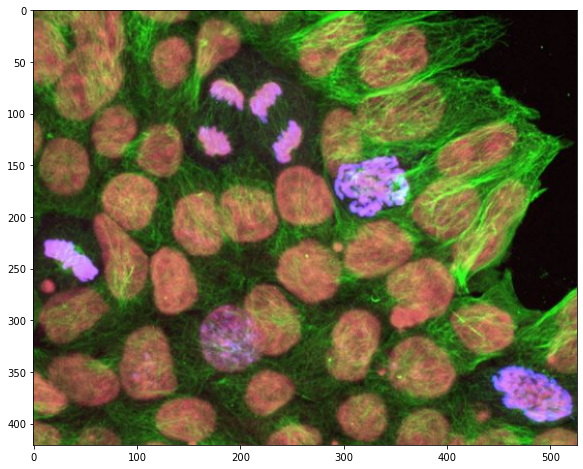

In [4]:
print(image.shape)
plt.figure(figsize=(16,8))
plt.imshow(image)
plt.show()

<h1>Do Interactive Segmentation</h1>

In [5]:
action = intractivesegmentation()
action.segment(image)

<h1>segmented image display</h1>

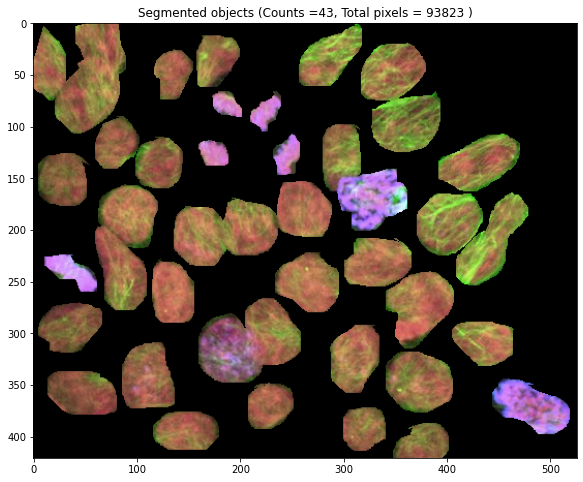

In [6]:
img = action.getsegmentedimage()
plt.figure(figsize=(16,8))
plt.title(f"Segmented objects (Counts ={action.count()}, Total pixels = {action.getTotalarea()} )")
plt.imshow(img)
plt.show()

<h3>Total Number of segmented objects</h3>

In [7]:
print(f"you have segmented '{action.count()}' Objects")
print(f"With Total number of Pixel : '{action.getTotalarea()}' Pixel")

you have segmented '43' Objects
With Total number of Pixel : '93823' Pixel


<h1>Segmented Objects summary</h1>

<h3>Objects areas table</h3>

In [8]:
tabel = action.gettable()
data = pd.DataFrame(tabel["area"],columns=["area(px)"])
data[:]

,area(px)
0,3339
1,1667
2,1981
3,1318
4,1654
5,1627
6,1891
7,2125
8,2784
9,2502


<h1>search about objects</h1>

<h2> get th object using his index</h2>

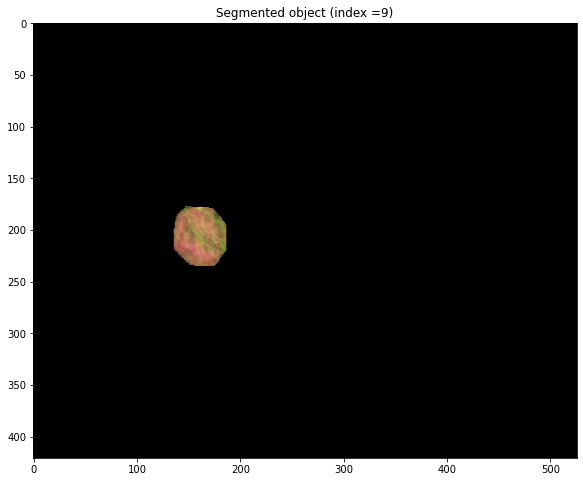

In [11]:
#get the 9th object 
index = 9
result = action.viewCell(index)
#view
plt.figure(figsize=(16,8))
plt.title(f"Segmented object (index ={index})")
plt.imshow(result)
plt.show()

<h2>search about { Max - Min- Median} Object</h2>


In [12]:
#get
maxObject = action.get("max")
minObject = action.get("min")
medObject = action.get("median")

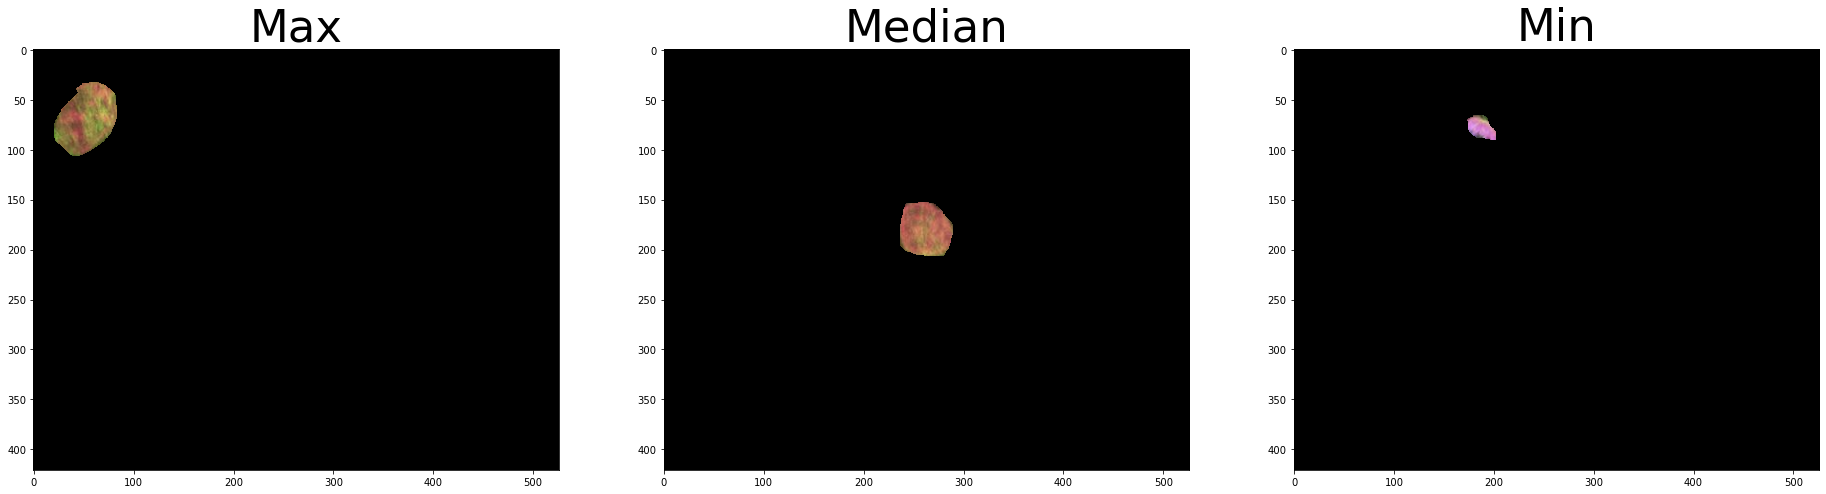

In [13]:
#view
plt.figure(figsize=(32,16))
plt.subplot(1,3,1)
plt.title("Max",fontdict={'fontsize': 45})
plt.imshow(maxObject)
plt.subplot(1,3,2)
plt.title("Median",fontdict={'fontsize': 45})
plt.imshow(medObject)
plt.subplot(1,3,3)
plt.title("Min",fontdict={'fontsize': 45})
plt.imshow(minObject)
plt.show()

<h2>search about {Max - Min } Number of Objects</h2> 

In [17]:
#get the max 7 object
Nmax = 7
bigobjects = action.bigN(Nmax)

#get the min 7 object
Nmin = 4
smallobjects = action.smallN(Nmin)

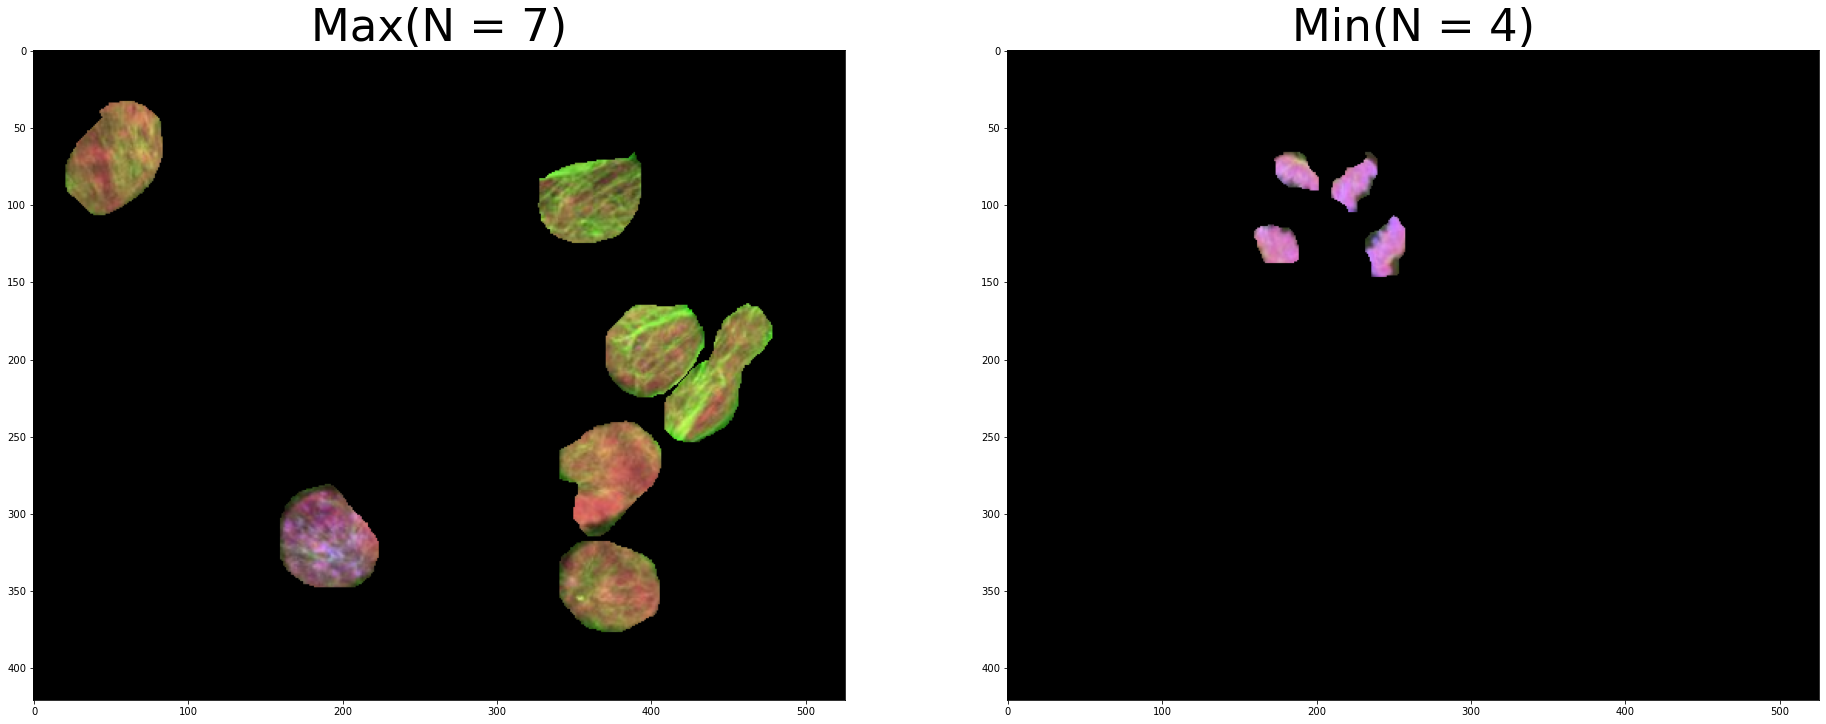

In [18]:
#view
plt.figure(figsize=(32,16))
plt.subplot(1,2,1)
plt.title(f"Max(N = {Nmax})",fontdict={'fontsize': 45})
plt.imshow(bigobjects)
plt.subplot(1,2,2)
plt.title(f"Min(N = {Nmin})",fontdict={'fontsize': 45})
plt.imshow(smallobjects)
plt.show()